<a href="https://colab.research.google.com/github/fkgusdk/TEAM-YeoRi/blob/main/Section_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Line Chart 이해 및 제작
주식 등과 같이 시간에 따른 변화를 보여줄 때 주로 사용

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 시각화 테이블 (?) 크기 
plt.rcParams['figure.figsize'] = [10,8] # (가로, 세로)

# 그 외 스타일들
sns.set(style='whitegrid') # 흰색 바탕 + 격자
sns.set_palette('pastel')

### matplotlib 활용

In [3]:
# line 예제를 위해 tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용

tips = sns.load_dataset('tips')
sun_tips = tips[tips.day == 'Sun']

In [4]:
# 현재 서버 시간 사용하기 위해 dayatime 라이브러리 사용

import datetime
print(datetime.date.today())

date = []
today = datetime.date.today()
date.append(today)

for d in range(sun_tips.shape[0]-1):
  today += datetime.timedelta(7) # 하루씩 추가
  date.append(today)

date

2022-09-05


[datetime.date(2022, 9, 5),
 datetime.date(2022, 9, 12),
 datetime.date(2022, 9, 19),
 datetime.date(2022, 9, 26),
 datetime.date(2022, 10, 3),
 datetime.date(2022, 10, 10),
 datetime.date(2022, 10, 17),
 datetime.date(2022, 10, 24),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 11, 7),
 datetime.date(2022, 11, 14),
 datetime.date(2022, 11, 21),
 datetime.date(2022, 11, 28),
 datetime.date(2022, 12, 5),
 datetime.date(2022, 12, 12),
 datetime.date(2022, 12, 19),
 datetime.date(2022, 12, 26),
 datetime.date(2023, 1, 2),
 datetime.date(2023, 1, 9),
 datetime.date(2023, 1, 16),
 datetime.date(2023, 1, 23),
 datetime.date(2023, 1, 30),
 datetime.date(2023, 2, 6),
 datetime.date(2023, 2, 13),
 datetime.date(2023, 2, 20),
 datetime.date(2023, 2, 27),
 datetime.date(2023, 3, 6),
 datetime.date(2023, 3, 13),
 datetime.date(2023, 3, 20),
 datetime.date(2023, 3, 27),
 datetime.date(2023, 4, 3),
 datetime.date(2023, 4, 10),
 datetime.date(2023, 4, 17),
 datetime.date(2023, 4, 24),
 datetime.

In [5]:
sun_tips['date'] = date
sun_tips

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2022-09-05
1,10.34,1.66,Male,No,Sun,Dinner,3,2022-09-12
2,21.01,3.50,Male,No,Sun,Dinner,3,2022-09-19
3,23.68,3.31,Male,No,Sun,Dinner,2,2022-09-26
4,24.59,3.61,Female,No,Sun,Dinner,4,2022-10-03
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2024-01-15
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2024-01-22
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2024-01-29
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2024-02-05


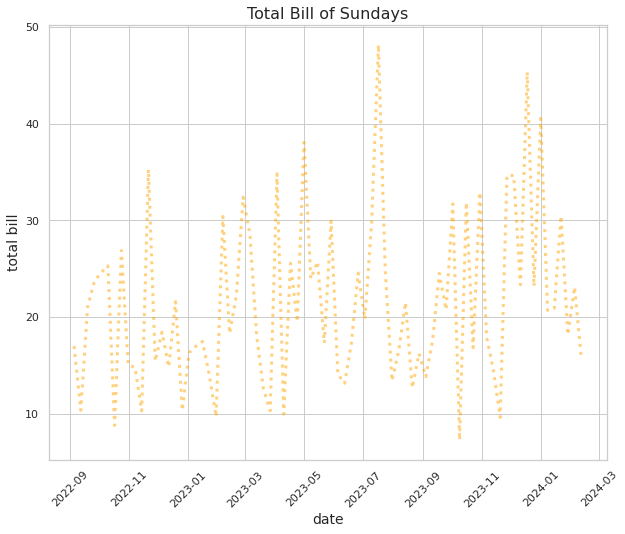

In [6]:
# 라인 차트 그리기
plt.plot(sun_tips['date'],sun_tips['total_bill'] # x,y
         ,linestyle=':' # 그래프가 점선이 됨 ('--', '-.' 등도 있음)
         ,linewidth=3 # 그래프 선 굵기
         ,color='orange'
         ,alpha=0.5 # 투명도
         )

plt.title('Total Bill of Sundays', fontsize=16)
plt.xlabel('date',fontsize=14)
plt.ylabel('total bill', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Seaborn 이용

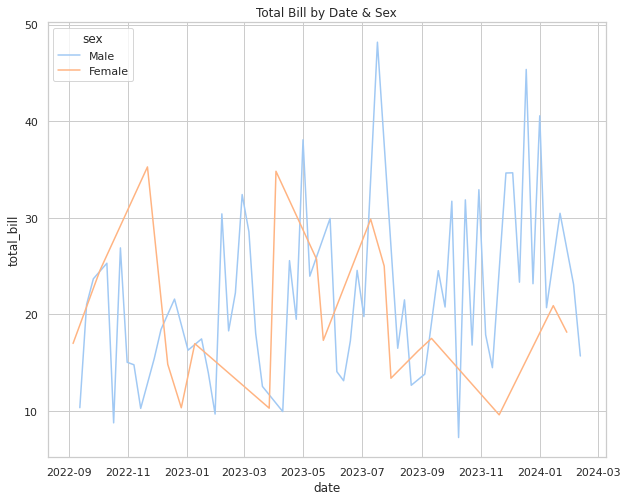

In [7]:
sns.lineplot(data=sun_tips,
             x='date', y='total_bill'
             , hue='sex' # 성별 별로 나눠서 도출 -> 여기서는 여자의데이터가 적다는 것을 알 수 있음 
             )
plt.title('Total Bill by Date & Sex')

plt.show()